## Data Preprocessing

In [2]:
## Libraries
import pandas as pd
import numpy as np
from numpy import isnan
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Import Dataset
## For this notebook the example data it is the training set for the classic house prices prediccition challenge

titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
titanic_df.shape

(891, 12)

#### a) Duplicated Values

In [89]:
#Remove Duplicates 
titanic_df = titanic_df.drop_duplicates()
titanic_df.shape

(891, 12)

#### b) Null Values

In [90]:
## Na count by feature
titanic_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [91]:
## Dataset dimenssions
df.shape

(891, 12)

There are 2 most used method to handle missing data 

--> 1. By eliminanting those columns/rows, it is the easiest way but it is necessary to be careful with the lose of some information that can be needed by the model to have accurate predictions

--> 2. Replacing missing values with 0s, Mean, Mode, Median, closest value, multivariate imputation. 

In [92]:
### Eliminate rows with missing data --> Only when the dataset is too large and or multiple values are missing in the tuple
titanic_df.dropna(inplace = True)

Parameters:

axis: {0 or ‘index’, 1 or ‘columns’}, default 0

how: {‘any’, ‘all’}, default ‘any’

thresh: int, optional --> Require that many non-NA values.

subset: array-like, optional --> Labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include.

inplace: bool, default False --> If True, do operation inplace and return None.

In [ ]:
### Fill the Missing Values
### --> Some simple methods

## Fill NaN elements with 0s
titanic_df.fillna(0)

## Fill by propagating non-null valueas  forward or backward
titanic_df.fillna(method='ffill')

## Replace all NaN elements in column ‘A’, ‘B’, ‘C’, and ‘D’, with 0, 1, 2, and 3 respectively.
values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
titanic_df.fillna(value=values)


In [ ]:
## Fill missing values by mean 
titanic_df['Age'].fillna((titanic_df['Age'].mean()), inplace=True)

In [ ]:
## Sklear Method> SimpleImputer (mean, median, most_frequent, constant) ### Univariate Imputing: uses the non missing values in each column to estimate the missing values
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
#imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
#imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=80)

imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imputer.fit(titanic_df)
imputed_df = imputer.transform(titanic_df)

### This can only be done with numerical variables


In [36]:
#### Multivariate Imputing
# Models each feature with missing values as a function of other features, and uses that estimate for imputation. (for small datasets it is recomend to use the SimpleIputer)
# Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [37]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
horse_df = pd.read_csv(url, header=None, na_values='?')

In [38]:
# summarize the first few rows
print(horse_df.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [39]:
horse_df.shape

(300, 28)

In [40]:
# summarize the number of rows with missing values for each column
for i in range(horse_df.shape[1]):
    # count number of rows with missing values
    n_miss = horse_df[[i]].isnull().sum()
    perc = n_miss / horse_df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


In [41]:
# split into input and output elements
data = horse_df.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# Define Iterative imputer
imputer2 = IterativeImputer(n_nearest_features=None, imputation_order='ascending')
# fit on the dataset
imputer2.fit(X)
imputed_X = imputer2.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(imputed_X).flatten()))

Missing: 1605
Missing: 0


#### c) Outliers Detection and Treatment

In [4]:
## Numerical Columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
## Categorical Columns
titanic_df.describe(include = ['O'] )

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Becker, Miss. Marion Louise",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [5]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
houses = pd.read_csv(url, header=None)

In [6]:
houses.shape

(506, 14)

Few methods that can be used:

--> Standars Deviation: When the distribution of the data it is approx. Normal then the 68% of the data lie within one std dev. 95% within 2 std dev. and 99.7% within 3 std dev.

--> Boxplots: It is an easy way to visualize ouliers. The IQR can be used to remove outliers (Q1 - 1.5*IQR) and (Q3 + 1.5*IQR) wiskers of the plot

<AxesSubplot:xlabel='5', ylabel='Count'>

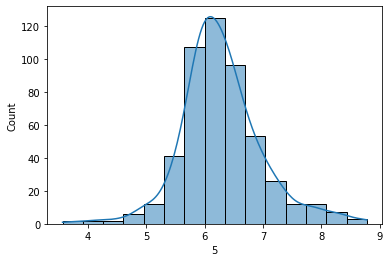

In [57]:
sns.histplot(data=houses, x= , bins = 15, kde = True)

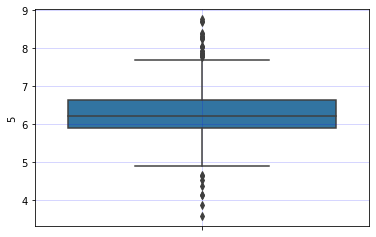

In [61]:
sns.boxplot(y=houses.iloc[:,5], data=houses)
plt.grid(color = 'b', alpha = 0.2)
plt.show()

--> DBScan clustering: Density-Based Spatial Clustering of Applications with Noise. Unsupervised ML Method, cluster the data into groups and define Core Points, Border Points and Noisy Points.

In [14]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(eps = 3, min_samples = 2)
clusters = outlier_detection.fit_predict(houses)
list(clusters).count(-1)

481

--> Isolation Forest: is an unsupervised learning algorithm that belongs to the ensemble decision trees family. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies

In [70]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(houses)

elements_count = {}
# iterating over the elements for frequency
for element in preds:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

1: 391
-1: 115


#### d) Data Types

In [73]:
## Check the different data types of a column
print(len(titanic_df['Cabin'].map(type).unique()))
print(titanic_df['Cabin'].map(type).unique())

2
[<class 'float'> <class 'str'>]


#### e)Encoding Categorical Features

In [78]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Two ways of make it done

--> 1. One hot Encoding

--> 2. Label Encoding


In [95]:
from sklearn.preprocessing import OrdinalEncoder

## list of categorical features
categorical = ['Name','Sex','Ticket','Cabin','Embarked']

enc = OrdinalEncoder()
df[categorical] = enc.fit_transform(df[categorical])
                                       
print(df['Sex'].map(type).unique())
print(df['Sex'].unique())

[<class 'float'>]
[0. 1.]


#### f) Feature Scaling

Needed when the features have very different scales and contain some very large outliers. 
The principal dificulties are the data visualization and the degrade of the predictive performance of many machine learnign algorithms.

StandardScaler: z = (x - u) / s (cannot guarantee balanced feature scales in the presece of outliers)

MinMaxScaler: y = (x – min) / (max – min) rescales the data set such that all feature values are in the range [0,1] (also sensitive to outliers)

RobustScaler: removes the median and scales the data according to the IQR

#### g) Splitting dataset

In [ ]:
### Train , Validation and Test Sets --> Hold-Out

data = houses.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Cross Validation 
Cross-validation or ‘k-fold cross-validation’ is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

It is prefered because gives a better indication on how well the model will perform on un seen data. 

The hold-out is good when teh dataset is very large, to build an anitial project or the time is scarse.

#### h) More Feature Engineering

Some examples...

--> Binning

The main motivation of binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance. Every time you bin something, you sacrifice information and make your data more regularized.

#Numerical Binning Example
Value      Bin       
0-30   ->  Low       
31-70  ->  Mid       
71-100 ->  High

#Categorical Binning Example
Value      Bin       
Spain  ->  Europe      
Italy  ->  Europe       
Chile  ->  South America
Brazil ->  South America

--> Log Transform
It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.

etc...